#Description : This program classifies images

In [ ]:
# Import the libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [ ]:
#load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
 #Looka the data types of the variables

 print(type(x_train))
 
 print(type(y_train))
 
 print(type(x_test))
 
 print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#Take a look at the first image as an array
index = 0
x_train[index]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

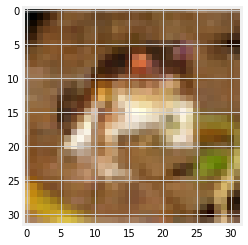

In [ ]:
#show the image as a picture
img =plt.imshow(x_train[index])

In [ ]:
#Get the label image
print('the image label is:', y_train[index]) 

the image label is: [6]


In [ ]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]
#print the image class
print('the image class is:', classification[y_train[index][0]])

the image class is: frog


In [ ]:
#Convert the labels inti a set of 10 numbers to input into neural network
y_train_one_hot= to_categorical(y_train )
y_test_one_hot= to_categorical(y_test )

In [ ]:
#print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new label of the image above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
x_train= x_train /255
x_test= x_test/255

In [ ]:
#Create the models architecture
model = Sequential()
#Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
#Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
#Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Now convert all these data to a single dimensional data
model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop =EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_train_one_hot,epochs=15,
          validation_data=(x_test,y_test_one_hot),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.6950 - accuracy: 0.3775 - val_loss: 1.2671 - val_accuracy: 0.5545
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2050 - accuracy: 0.5729 - val_loss: 1.1105 - val_accuracy: 0.6080
Epoch 3/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0310 - accuracy: 0.6385 - val_loss: 1.0643 - val_accuracy: 0.6279
Epoch 4/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9243 - accuracy: 0.6766 - val_loss: 1.0001 - val_accuracy: 0.6533
Epoch 5/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8183 - accuracy: 0.7158 - val_loss: 1.0207 - val_accuracy: 0.6496
Epoch 6/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7392 - accuracy: 0.7437 - val_loss: 0.9882 - val_accuracy: 0.6617
Epoch 7/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6749 - accuracy: 0.7642 - val_loss: 0.9632 -

In [ ]:
#evaluate the model using the test data
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 3s 10ms/step - loss: 1.0833 - accuracy: 0.6640


0.6639999747276306

In [ ]:
hist= pd.DataFrame(model.history.history)

In [ ]:
#test the model with an example

from google.colab import files
upload =files.upload()

Saving images.jpg to images.jpg


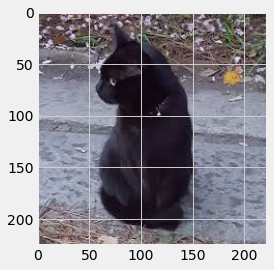

In [ ]:
#show the image
new_image =plt.imread('images.jpg')
img =plt.imshow(new_image)

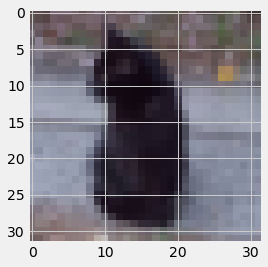

In [ ]:
#resize the image
from skimage.transform import resize
resized_image =resize(new_image,(32,32,3))
img= plt.imshow(resized_image)

In [ ]:
#Get the models predictions

predictions =model.predict(np.array([resized_image]))

#show the predictions
predictions

array([[2.38947314e-03, 1.04910505e-05, 7.75258429e-03, 5.64672351e-01,
        2.13902746e-03, 4.20878917e-01, 5.80912529e-05, 9.62055870e-04,
        1.13685266e-03, 1.93210539e-07]], dtype=float32)

In [ ]:
#show the predictions from least to greatest

list_index=[0,1,2,3,4,5,6,7,8,9]
x =predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i] =list_index[j]
      list_index[j] =temp

      #show the sorted labels in order
      print(list_index)




[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 0, 2, 3, 4, 5, 6, 7, 8, 1]
[0, 9, 2, 3, 4, 5, 6, 7, 8, 1]
[2, 9, 0, 3, 4, 5, 6, 7, 8, 1]
[2, 0, 9, 3, 4, 5, 6, 7, 8, 1]
[3, 0, 9, 2, 4, 5, 6, 7, 8, 1]
[3, 2, 9, 0, 4, 5, 6, 7, 8, 1]
[3, 2, 0, 9, 4, 5, 6, 7, 8, 1]
[3, 2, 0, 4, 9, 5, 6, 7, 8, 1]
[3, 5, 0, 4, 9, 2, 6, 7, 8, 1]
[3, 5, 2, 4, 9, 0, 6, 7, 8, 1]
[3, 5, 2, 0, 9, 4, 6, 7, 8, 1]
[3, 5, 2, 0, 4, 9, 6, 7, 8, 1]
[3, 5, 2, 0, 4, 6, 9, 7, 8, 1]
[3, 5, 2, 0, 4, 7, 9, 6, 8, 1]
[3, 5, 2, 0, 4, 7, 6, 9, 8, 1]
[3, 5, 2, 0, 4, 8, 6, 9, 7, 1]
[3, 5, 2, 0, 4, 8, 7, 9, 6, 1]
[3, 5, 2, 0, 4, 8, 7, 6, 9, 1]
[3, 5, 2, 0, 4, 8, 7, 6, 1, 9]


In [ ]:
for i in range(10):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100), '%')

cat : 56 %
dog : 42 %
bird : 1 %
airplane : 0 %
deer : 0 %
ship : 0 %
horse : 0 %
frog : 0 %
automobile : 0 %
truck : 0 %
